# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown
import gdown
from google.colab import drive
import os

# Load Data

In [ ]:
df_anger = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/AngerData.csv', delimiter='\t')
df_fear = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/FearData.csv', delimiter='\t')
df_joy = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/JoyData.csv', delimiter='\t')
df_love = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/LoveData.csv', delimiter='\t')
df_neutral = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/NeutralData.csv', delimiter='\t')
df_sad = pd.read_csv('https://raw.githubusercontent.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion/refs/heads/main/Emotion%20Dataset%20from%20Indonesian%20Public%20Opinion/SadData.csv', delimiter='\t')

df_depression = pd.read_csv('https://raw.githubusercontent.com/YafetPontoh/dataset_mental_health_description/refs/heads/master/Translated_Combined_Data.csv')
df_depression = df_depression[['translate', 'status']]
df_depression = df_depression.rename(columns={'translate': 'Tweet'})
df_depression = df_depression.rename(columns={'status': 'Label'})

# Exploratory Data Analysis (EDA)

In [ ]:
# Menggabungkan semua dataset
df_gabungan = pd.concat([df_depression, df_anger, df_fear, df_joy, df_love, df_neutral, df_sad], ignore_index=True)
df_gabungan.head()

,Tweet,Label
0,Kecemasan saya memberitahu saya untuk tidak ju...,Anxiety
1,Khawatir saya menderita kanker ovarium. Semaki...,Anxiety
2,Untuk Penderita HA yang memiliki kecemasan yan...,Anxiety
3,"Eye floaters karena stres? Halo, Saya baru-bar...",Anxiety
4,"Ada rasa cemas berlebihan saat ini, .Dan, masi...",Anxiety


In [ ]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   10459 non-null  object
 1   Label   10459 non-null  object
dtypes: object(2)
memory usage: 163.6+ KB


In [ ]:
df_gabungan.nunique()

,0
Tweet,10396
Label,13


In [ ]:
df_gabungan['Label'].value_counts()

,count
Label,
Neutral,2001
Joy,1275
Anger,1130
Sad,1003
Fear,911
Love,760
Depression,500
Suicidal,500
Normal,499


In [ ]:
grouped = df_gabungan.groupby('Label')
for label, group in grouped:
    print(f"Data untuk label {label}:")
    print(group.head(5))
    print("\n")

Data untuk label Anger:
                                                  Tweet  Label
3379                        pagi2 udah di buat emosi :)  Anger
3380  kok stabilitas negara, memange 10 thn negara t...  Anger
3381                       dah lah emosi mulu liat emyu  Anger
3382  aib? bodoh benar! sebelum kata aib itu muncul,...  Anger
3383                            dih lu yg nyebelin bego  Anger


Data untuk label Anxiety:
                                               Tweet    Label
0  Kecemasan saya memberitahu saya untuk tidak ju...  Anxiety
1  Khawatir saya menderita kanker ovarium. Semaki...  Anxiety
2  Untuk Penderita HA yang memiliki kecemasan yan...  Anxiety
3  Eye floaters karena stres? Halo, Saya baru-bar...  Anxiety
4  Ada rasa cemas berlebihan saat ini, .Dan, masi...  Anxiety


Data untuk label Bipolar:
                                                 Tweet    Label
494  Mania?? Saya didiagnosis menderita bipolar leb...  Bipolar
495  Adakah Orang Di Sini Yang Mengalami E

In [ ]:
# Melihat Missing value dan duplicated Value
print("Missing value :\n",df_gabungan.isnull().sum())
print("-------------------------")
print("Duplicated value : ",df_gabungan.duplicated().sum())

Missing value :
 Tweet    0
Label    0
dtype: int64
-------------------------
Duplicated value :  53


# Visualisasi Data

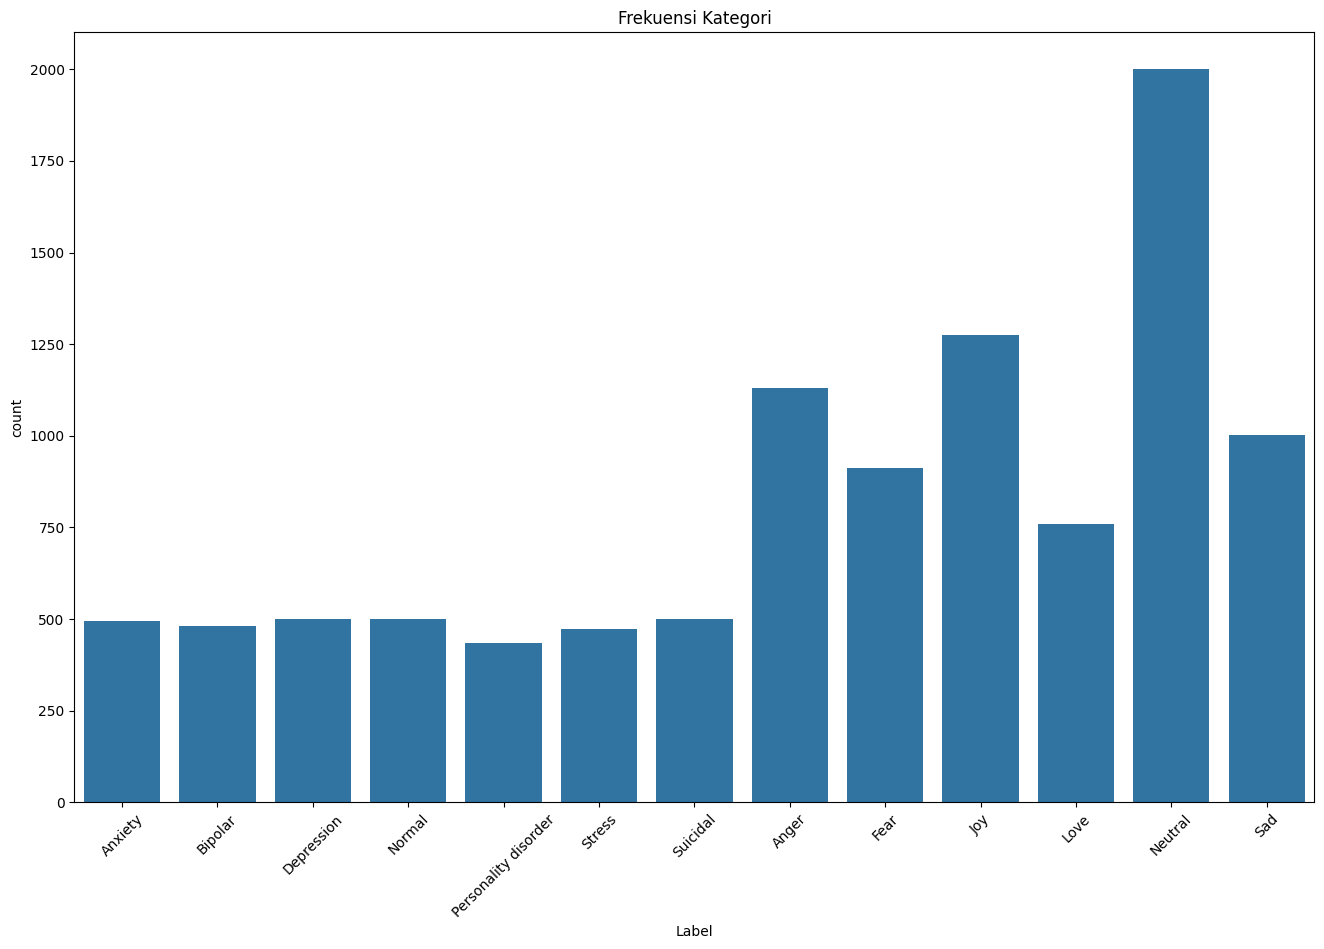

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Label', data=df_gabungan)
plt.title('Frekuensi Kategori')
plt.xticks(rotation=45)
plt.show()

# Cleaning Text

In [ ]:
# Menghapus data duplikat
clean_df = df_gabungan.drop_duplicates(keep='first')
clean_df.duplicated().sum()

np.int64(0)

In [ ]:
# Menggabunkan semua data menjadi postif dan negatif
label_mapping = {
    'Anxiety': 'Negative',
    'Bipolar': 'Negative',
    'Depression': 'Negative',
    'Personality disorder': 'Negative',
    'Stress': 'Negative',
    'Suicidal': 'Negative',
    'Anger': 'Negative',
    'Fear': 'Negative',
    'Sad': 'Negative',
    'Normal': 'Positive',
    'Joy': 'Positive',
    'Love': 'Positive',
    'Neutral': 'Positive'
}

# Mapping
clean_df['Label'] = clean_df['Label'].map(label_mapping)

<ipython-input-11-1466a7911d48>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Label'] = clean_df['Label'].map(label_mapping)


In [ ]:
clean_df['Label'].value_counts()

,count
Label,
Negative,5903
Positive,4503


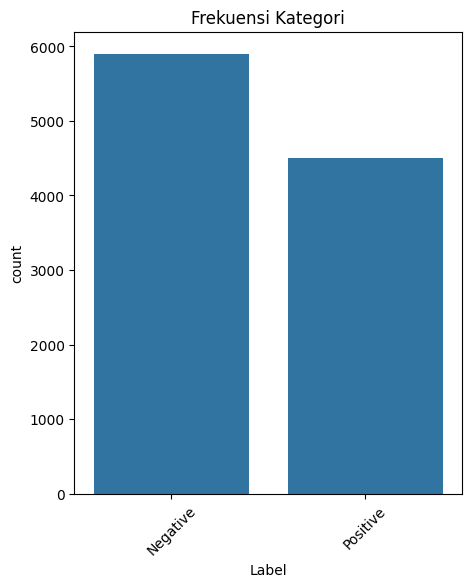

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot(x='Label', data=clean_df)
plt.title('Frekuensi Kategori')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Eksport dataset

# Mount Drive
drive.mount('/content/drive')

# Definisikan path folder & file
folder_path = '/content/drive/MyDrive/Colab Notebooks/project capstone notebook/Dataset'
os.makedirs(folder_path, exist_ok=True)
file_path = f'{folder_path}/data_clean.csv'

# 4. Simpan file
clean_df.to_csv(file_path, index=False)
print(f"File berhasil disimpan di: {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/project capstone notebook/Dataset/data_clean.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
